# Convolutional Neural Network 기초

## CNN

* 이미지 분류를 위한 특별한 구조의 Deep Neural Network

 * local receptive fields
 * shared weights
 * pooling

## Local Receptive Field


* Input Layer의 일부 Input에 대해서만 다음 Hidden Layer로 weight 연결
 * 예: 28x28 Input Layer에서 5x5 영역에 대해서만 weight 연결 
 * => 다음 Hidden Layer의 크기는 (28-5+1)x(28-5+1) = 24x24 로 변경됨
 * Sparse Connectivity
 * keras 신경망에서 일자로 펼쳐놓은것처럼 여기서 펼쳐놓지 않는다(벡터로 만들지 않고 2차원인 상태에서 일부영역을 만들어서 파이1을 만든다) 
 * 5*5의 면적에 대한 weight를 구하므로써 25개의 weight만구한다 (신경망에서는 28*28 =784 모두의 weight를 구했음) 
 * 5*5 의 면적에 대한 weight가 다음 layer의 한점으로 변경해야 해서 스케일링 됨 = convolution 이라고 함 
 * 한줄씩 옮기면서 25개의 데이터에 대하여 weight를 계속 구해준다. 
 

<img src="http://neuralnetworksanddeeplearning.com/images/tikz44.png">
<img src="http://neuralnetworksanddeeplearning.com/images/tikz45.png">


* http://cs231n.github.io/assets/conv-demo/index.html

## Shared weights and biases

* 모든 연결에 대해 공통 weight & bias 계수 사용
 * 위 예에서 parameter의 수는 26개 (5x5+1)
 
$$
\begin{eqnarray} 
  \sigma\left(b + \sum_{l=0}^4 \sum_{m=0}^4  w_{l,m} a_{j+l, k+m} \right).
\end{eqnarray}
$$


* 이 연산은 2-D image filter의 convolution연산과 동일 
 * => Convolution NN
 * 공통 weight: image kernel, image filter

## Image Filter

<img src="http://i.stack.imgur.com/GvsBA.jpg">

In [2]:
##스타트업 파일

from scipy.stats import norm
import numpy as np
import scipy as sp
from pandas.core import datetools 
import pandas as pd
import statsmodels.api as sm ## R 패키지에서 불러온것, 샘플데이터 옮겨쓸수 있는 프로젝트 있음. 회귀분석에 유용 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk 
## 전처리 

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  


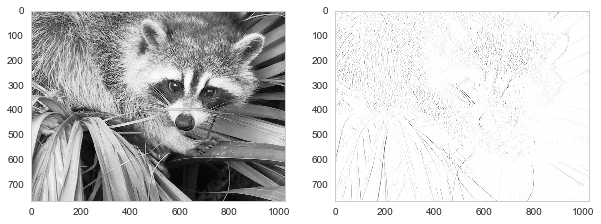

In [3]:
import scipy.ndimage
img = 255 - sp.misc.face(gray=True).astype(float)
k = np.zeros((2,2))
k[:,0] = 1; k[:,1] = -1 ## convolution kernel 2*2사이즈의 이미지 필터로 오리지널 이미지를 이와 같은 이미지필터로 오른쪽과 같이 바꿔줌

## 세로줄 1(검은색),-1(흰색) 처럼 세로줄의 경계선을 찾아준다. 이미지가  세로줄이 있는 경우를 변경된 값으로 나타내주어 오른쪽이미지와 같이 나온다 
img2 = np.maximum(0, sp.ndimage.filters.convolve(img, k))
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img)
plt.grid(False)
plt.subplot(122)
plt.imshow(img2)
plt.grid(False)

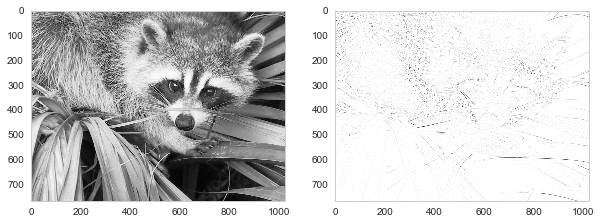

In [4]:
import scipy.ndimage
img = 255 - sp.misc.face(gray=True).astype(float)
k = np.zeros((2,2))
k[0,:] = 1; k[1,:] = -1 ## convolution kernel 2*2사이즈의 이미지 필터로 오리지널 이미지를 이와 같은 이미지필터로 오른쪽과 같이 바꿔줌

## 가로줄 1(검은색),-1(흰색) 처럼 가로줄의 경계선을 찾아준다. 이미지가  가로줄이 있는 경우를 변경된 값으로 나타내주어 오른쪽이미지와 같이 나온다 
img2 = np.maximum(0, sp.ndimage.filters.convolve(img, k))
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img)
plt.grid(False)
plt.subplot(122)
plt.imshow(img2)
plt.grid(False)

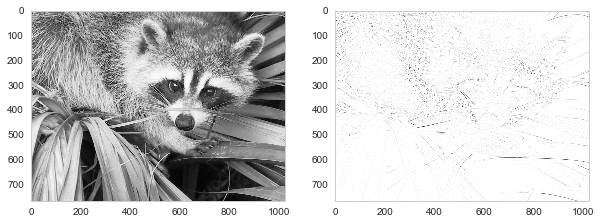

In [13]:
import scipy.ndimage
img = 255 - sp.misc.face(gray=True).astype(float)
k = np.zeros((2,2))
k[0,:] = 2; k[1,:] = -2
## 이미지필터 2*2 를 써서 2와 -2의 필터= convolution kernel 2*2사이즈의 이미지 필터로 오리지널 이미지를 이와 같은 이미지필터로 오른쪽과 같이 바꿔줌

## 가로줄 1(검은색),-1(흰색) 처럼 가로줄의 경계선을 찾아준다. 이미지가  가로줄이 있는 경우를 변경된 값으로 나타내주어 오른쪽이미지와 같이 나온다 
img2 = np.maximum(0, sp.ndimage.filters.convolve(img, k))
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img)
plt.grid(False)
plt.subplot(122)
plt.imshow(img2)
plt.grid(False)

## Feature Map

* 만약 weight가 특정 image patter에 대해 a=1인 출력을 내도록 training 되었다면 
 * hidden layer는 feature가 존재하는 위치를 표시
 * => feature map
* 여기에서의 feature(filter의 특징,특성) 는 input data를 의미하는 것이 아니라 image 분류에 사용되는 input data의 특정한 pattern을 뜻함


<img src="http://www.kdnuggets.com/wp-content/uploads/computer-vision-filters.jpg">

* 이 두개의 나눠진 그림을 겹쳐서 보면 original 그림이 나옴
* 이미지 filter = convolution kernel 2개를 사용하여 2개의 그림으로 나눠서 나옴 

## Multiple Feature Maps

* 하나의 공통 weight set은 한 종류의 image feature만 발견 가능
* 복수의 feature map (weight set) 필요 =channel 
* 3개 복수의 feature 는 RGB 세개 장수가 합쳐서 색깔을 표현 
* 이미지 classification 을 하기위한 feature pattern을 찾기 위해서 최적화된 W (convolution kernel)을 컴퓨터가 찾아준다 -> 최소의 cost를 찾기 위하여 W를 찾아주고 adoptation을 함 

<img src="http://neuralnetworksanddeeplearning.com/images/tikz46.png"> 


* MNIST digit image 에 대해 training이 완료된 20개 feature map의 예 -이 모든 20개의 그림을 퍼즐처럼 맞춰보면 숫자 0이 나옴

<img src="http://neuralnetworksanddeeplearning.com/images/net_full_layer_0.png" style="width:50%;"> 

## Max Pooling Layer

* 영역내에서 가장 최대값 출력
 * 영역내에 feature가 존재하는지의 여부
 * 전체 영역이 축소 
 
 * 4개의 영역을 나눠서 영역당 제일 큰 값을 출력하여 1개의 영역으로 축소 
 
<img src="http://cs231n.github.io/assets/cnn/maxpool.jpeg" style="width:50%;"> 



<img src="http://neuralnetworksanddeeplearning.com/images/tikz48.png">

## L2 pooling

* maximum 값 대신에 영역내의 값의 sum of square 사용

## Output Layer

* softmax 
* 원래 컬러 이미지는 24*24로 나오지만 RGB 의 3개차원의 채널로 이루어진 3장의 24*24 이미지이다 
* 이것을 한줄의 벡터로 펼쳐주고 이전에 했던 multi layer perceptro으로 classification을 한다
<img src="http://neuralnetworksanddeeplearning.com/images/tikz49.png">

## Demo

* http://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html

## cifar-10 데모 시험

10개의 사물이미지를 보여주고 classification 해서 1개를 고르는 문제 
Convolution Net JS: CNN Java script 
지금 돌아가면서 loss fuction을 계속 나타냄
맨마지막에 test 시험지를 주면서 10개의 객관식중 각각의 답 percentage를 나타내고 최종 답을 고름 


* input(32* 32 * 3) 32*32 사이즈의 RGB 3장을 사용 
* filter size 5*5* 3 를 16개 필터을 사용 (채널,weight: 16개의 채널을 하나로 겹쳐서 사용한것과 같음)
    (예시: 첫번째 weight는 가로줄을 찾고, 두번째는 왼쪽 아래 점을 찾고, 세번째는 대각선을 찾는 필터임) 

* output(convolution) = 32* 32 * 16개 필터(채널,weight,image filter)로 변경한 16장으로 나옴 


* pull(activation 함수가 max pull) 은 max pull을 사용하여 32*32 이미지가 16*16으로 변경 

* relu(activation 함수가 relu) 32*32 사이즈를 16*16으로 변경 20개필터(채널,weight,image filter)로 변경 